# Sample Size Calculation
## Introduction
- The study measures NfL levels at multiple time points in Patients with Progressive Supranuclear Palsy (PSP) to investigate the effects of GPB on these levels
- The primary analysis compares the change in NfL levels between visit 1 and visit 5 in both treatment groups, using a difference of differences approach
- This method allows for the comparison of the relative changes in NfL levels between visit 5 and visit 1 in the two treatment groups, while accounting for individual biomarker trajectories of study participants

### Goal
- To detect the anticipated difference in NfL levels with a power of 80% at a 5% significance level, the sample size of patients per group needs to be estimated.
- The calculation is based on an age-adjusted mean and standard deviation derived from a known PSP patient cohort.

### References
- Lund and London Cohort Reference: <a href="https://pubmed.ncbi.nlm.nih.gov/34099648/">A multicentre validation study of the diagnostic value of plasma neurofilament light (Astton et al., 2021)</a>
- Normal NfL: <a href="https://www.nature.com/articles/s41467-020-14612-6">Serum neurofilament light levels in normal aging and their association with morphologic brain changes (Khalil et al., 2020)</a>

<img src="../figures/Percentile_ranges_of_sNfL.png" style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

<h3 style="color: red;">Problem</h3>
<ul>
<li>Initially, our aim was to adjust the mean NfL levels to those observed in a normal aging cohort (Image left).</li>
<li>However, as NfL was measured in serum and not plasma, we instead adjusted the mean to the plasma levels of the control group from Ashton et al. (see references).</li>
</ul>

### Data Sources
- <a href="https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-23620-z/MediaObjects/41467_2021_23620_MOESM3_ESM.xlsx">Raw Data Lund and London Cohort</a>



In [8]:
import pandas as pd
import seaborn as sns

## Load dataset
- Read excel data table and transform to pandas dataframe

In [9]:
df = pd.read_excel("../data/raw_data_nfl_psp.xlsx")
print(df)

     Cohort    Group  Plasma_NfL
0      Lund      PSP     25.2422
1      Lund      PSP     32.0351
2      Lund      PSP     33.2701
3      Lund      PSP     40.3717
4      Lund      PSP     47.7821
..      ...      ...         ...
428  London  Control     78.1817
429  London  Control     85.7133
430  London  Control    103.7206
431  London  Control    136.3652
432  London  Control    156.6321

[433 rows x 3 columns]


## View Mean and SD
- Calculate SD and Mean values for PSP and Control data in both Lund and London cohort
- Print output

In [10]:
mean = df.groupby(['Group', "Cohort"]).mean()
sd = df.groupby(['Group', "Cohort"]).std()
print("Mean Values")
print(mean)
print("")
print("SD Values")
print(sd)

Mean Values
                Plasma_NfL
Group   Cohort            
Control London   31.232323
        Lund     22.519377
PSP     London   72.719368
        Lund     83.598921

SD Values
                Plasma_NfL
Group   Cohort            
Control London   17.149753
        Lund     10.655829
PSP     London   38.534858
        Lund     41.459676


## Plot original dataset

- The boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
- Data in figure presented as in original publication (see references)

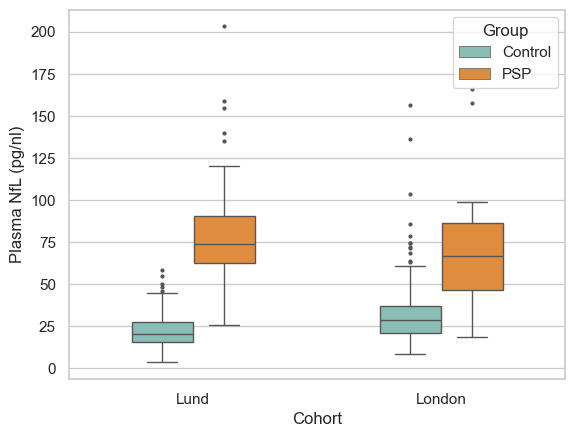

In [11]:
def df_boxplot():
    sns.set_theme(style="whitegrid", palette=['#83c5be','#fb8b24'])
    sns.boxplot(
        x="Cohort", y="Plasma_NfL", hue="Group", hue_order=['Control', "PSP"], data=df, linewidth=1.0, width=.5,
        flierprops={"marker": "o", "markersize": 2},
    ).set(
    ylabel='Plasma NfL (pg/nl)'
)

df_boxplot()

## Calculate Mean and SD for PSP pnly

### Filter Datafram

In [12]:
df_psp = df[df["Group"] == "PSP"]
print(df_psp)

    Cohort Group  Plasma_NfL
0     Lund   PSP     25.2422
1     Lund   PSP     32.0351
2     Lund   PSP     33.2701
3     Lund   PSP     40.3717
4     Lund   PSP     47.7821
5     Lund   PSP     53.6487
6     Lund   PSP     60.7503
7     Lund   PSP     62.2941
8     Lund   PSP     62.9116
9     Lund   PSP     63.2204
10    Lund   PSP     65.3817
11    Lund   PSP     68.7782
12    Lund   PSP     71.2483
13    Lund   PSP     71.8658
14    Lund   PSP     73.4097
15    Lund   PSP     75.2622
16    Lund   PSP     76.8061
17    Lund   PSP     78.6587
18    Lund   PSP     82.3639
19    Lund   PSP     84.5252
20    Lund   PSP     89.1567
21    Lund   PSP     90.0830
22    Lund   PSP    104.2862
23    Lund   PSP    158.9377
24    Lund   PSP    120.0333
25    Lund   PSP    134.8540
26    Lund   PSP    139.4855
27    Lund   PSP    154.6150
28    Lund   PSP    203.0912
29  London   PSP     18.5600
30  London   PSP     30.8000
31  London   PSP     34.6800
32  London   PSP     38.0740
33  London   P

### Calculate Values

In [13]:
mean_psp = df_psp.groupby("Cohort").mean()
sd_psp = df_psp.groupby("Cohort").std()
print("Mean PSP")
print(mean_psp)
print("")
print("SD PSP")
print(sd_psp)

Mean PSP
        Plasma_NfL
Cohort            
London   72.719368
Lund     83.598921

SD PSP
        Plasma_NfL
Cohort            
London   38.534858
Lund     41.459676


C:\Users\ajaec\AppData\Local\Temp\ipykernel_19048\3385214582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_psp = df_psp.groupby("Cohort").mean()
C:\Users\ajaec\AppData\Local\Temp\ipykernel_19048\3385214582.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sd_psp = df_psp.groupby("Cohort").std()


## Redfine data plot

1. NfL plasma levels in PSP patients in Lund and London cohort represented as swarmplot errorabrs (SD)
2. Black dot represents mean value

C:\Users\ajaec\AppData\Local\Temp\ipykernel_19048\3034884066.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(


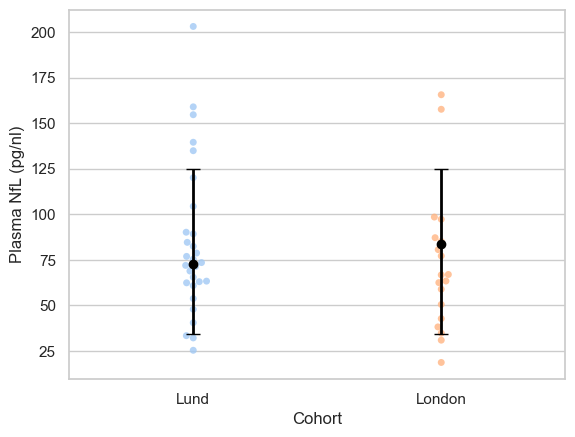

In [14]:
from matplotlib import pyplot as plt

def df_swarmplot():

    plt.errorbar(range(len(mean_psp)), mean_psp, yerr=sd_psp, capsize=5, color='black', alpha=1,
             linewidth=2, linestyle='', marker='o')

    sns.swarmplot(
        x="Cohort", y="Plasma_NfL", data=df_psp, palette="pastel", zorder=1, alpha=0.8
    ).set(
    ylabel='Plasma NfL (pg/nl)'
)

df_swarmplot()

## Results

### Mean and SD
<table style="margin-left:0; width: 750px; height: 200px; text-align: center">
  <tr>
    <th style="text-align: center;">Cohort</th>
    <th style="text-align: center;">PSP Mean</th>
    <th style="text-align: center;">Control Mean</th>
    <th style="text-align: center;">Adjusted Mean</th>
    <th style="text-align: center;">PSP SD</th>
  </tr>
  <tr>
    <td style="text-align: center;">London</td>
    <td style="text-align: center;">72.72</td>
    <td style="text-align: center;">31.23</td>
    <td style="text-align: center;">41.49</td>
    <td style="text-align: center;">38.53</td>
  </tr>
  <tr>
    <td style="text-align: center;">Lund</td>
    <td style="text-align: center;">83.59</td>
    <td style="text-align: center;">22.52</td>
    <td style="text-align: center;">61.07</td>
    <td style="text-align: center;">41.46</td>
  </tr>
</table>
<p><strong>Note:</strong> Adjusted mean refers to the difference between the mean NfL levels observed in the PSP patient cohort and those observed in the healthy individual cohort.</p>

### Sample Size calculations
Detect the anticipated 50% difference in  NfL plasma levels with a power of 80% at a 5% significance level for:
#### PSP Lund
##### Adjusted
 - Sample size calculation requires 29 patients per group
 - Considering a potential dropout rate of 20%, a total of 36 patients per arm is required, resulting in a total sample size of 72 patients.
##### Not adjusted
 - Sample size calculation requires 15 patients per group
 - Considering a potential dropout rate of 20%, a total of 19 patients per arm is required, resulting in a total sample size of 38 patients.
#### PSP London
##### Adjusted
 - Sample size calculation requires 54 patients per group
 - Considering a potential dropout rate of 20%, a total of 67 patients per arm is required, resulting in a total sample size of 66 patients.
##### Not adjusted
 - Sample size calculation requires 18 patients per group
 - Considering a potential dropout rate of 20%, a total of 22 patients per arm is required, resulting in a total sample size of 134 patients.

## Conclusion
- As no age-adjusted data was available for plasma NfL, we adjusted the mean to the control group of each cohort.
- If an adjusted model is to be used, we would recommend using the PSP Lund Cohort.
- If a non-adjusted model is to be used, we recommend calculating the sample size by anticipating a 60% difference in NfL plasma levels, given the low sample sizes.